

    Introduction: (#1)
    Loading Data and Explanation of Features: (#2)
    Exploratory Data Analysis (EDA): (#3)
    Applying Population Growth Models: (#4)
    CONCLUSION: (#5)



# INTRODUCTION

 In this, we will be working on Countries of the World Dataset . we will analyze Population of Countries with correlated features and also we will apply population growth models with visualisation.
 
 

# Loading Data and Explanation of features:

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# plotly
import plotly.plotly as py
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
#seaborn
import seaborn as sns
# matplotlib
import matplotlib.pyplot as plt
#missingno
import missingno as msno
# ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [4]:
data=pd.read_csv("countries of the world.csv")
data.head(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

In [6]:
data.replace(to_replace=r",",value=".",regex=True,inplace=True)

In [7]:
data.columns[4:]

Index(['Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [8]:
for each in data.columns[4:]:
    data[each]=data[each].astype("float") # change object to float
data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

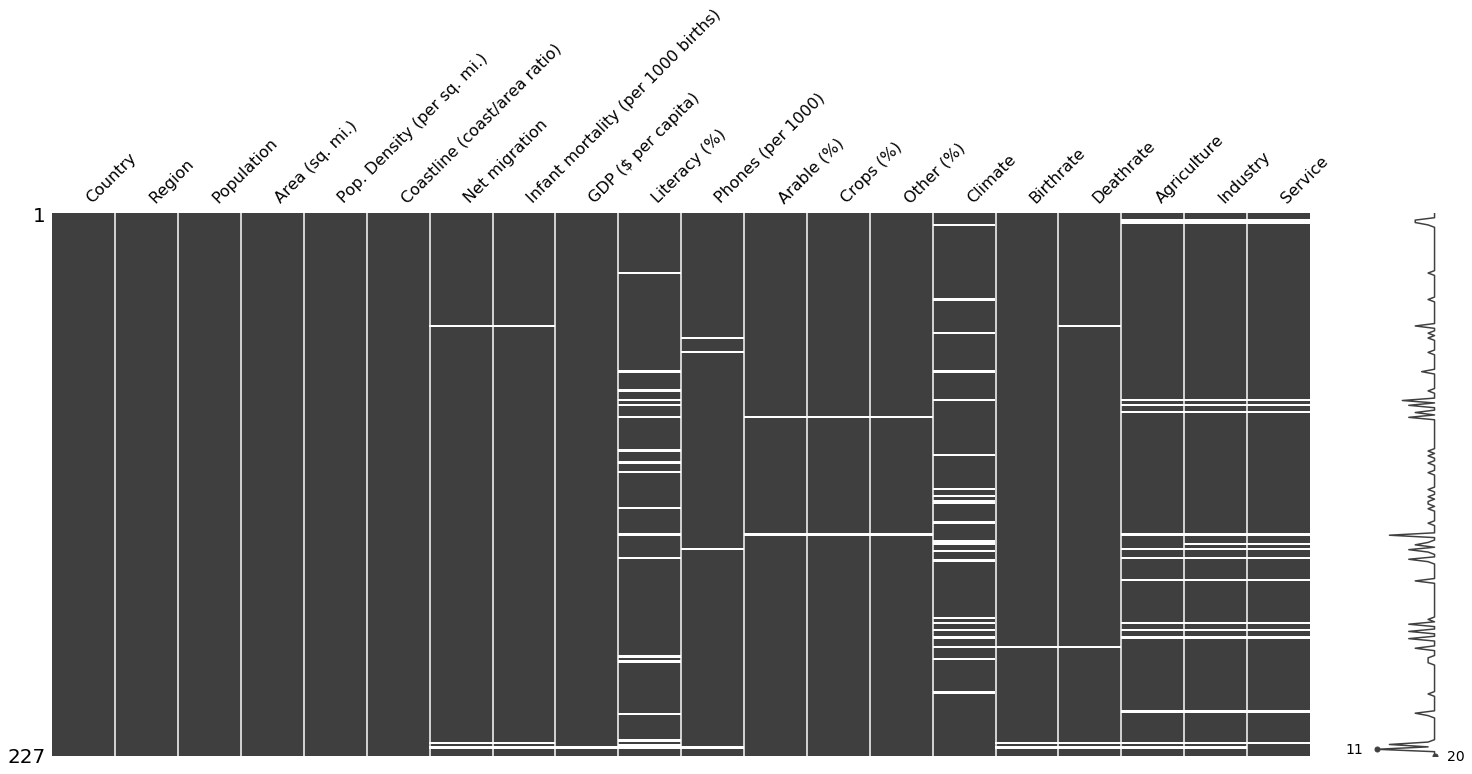

In [9]:
msno.matrix(data)
plt.show()

In [10]:
data.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [11]:
data[data==0].count()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             1
Coastline (coast/area ratio)          44
Net migration                         62
Infant mortality (per 1000 births)     0
GDP ($ per capita)                     0
Literacy (%)                           0
Phones (per 1000)                      0
Arable (%)                             9
Crops (%)                             28
Other (%)                              0
Climate                                0
Birthrate                              0
Deathrate                              0
Agriculture                            1
Industry                               0
Service                                0
dtype: int64

In [12]:
data.columns[7:]

Index(['Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')

In [13]:
for each in data.columns[7:]:
    data[each].replace(to_replace=0,value="NaN",inplace=True) # replace zeros to NaN values
for each in data.columns[7:]:
    data[each]=data[each].astype("float") # again making objects to float 
data.dropna(inplace=True) #dropping NaN values
data.index = range(len(data.index)) # rearange index numbers
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 20 columns):
Country                               165 non-null object
Region                                165 non-null object
Population                            165 non-null int64
Area (sq. mi.)                        165 non-null int64
Pop. Density (per sq. mi.)            165 non-null float64
Coastline (coast/area ratio)          165 non-null float64
Net migration                         165 non-null float64
Infant mortality (per 1000 births)    165 non-null float64
GDP ($ per capita)                    165 non-null float64
Literacy (%)                          165 non-null float64
Phones (per 1000)                     165 non-null float64
Arable (%)                            165 non-null float64
Crops (%)                             165 non-null float64
Other (%)                             165 non-null float64
Climate                               165 non-null float64
Birthrate       

# 3. Exploratory Data Analysis:

Let's see the Number Of Countries by Region:


In [14]:
trace = [go.Bar(
            x=data.Region.value_counts().index,
            y=data.Region.value_counts().values,
            text=data.Region.value_counts().values,
            hoverinfo = 'text',
            textposition = 'auto',
            marker = dict(color = 'rgba(253,174,97, 0.5)',
                             line=dict(color='rgb(0,200,200)',width=1.5)),
    )]

layout = dict(
    title = 'Number of Countries by Region',
)
fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [15]:
data.groupby("Region")["Population"].sum() 

Region
ASIA (EX. NEAR EAST)                   3650854813
BALTICS                                   3599068
C.W. OF IND. STATES                     132721302
EASTERN EUROPE                           92024232
LATIN AMER. & CARIB                     561332863
NEAR EAST                               183418548
NORTHERN AFRICA                         121992112
NORTHERN AMERICA                        298444215
OCEANIA                                  32100010
SUB-SAHARAN AFRICA                      697125124
WESTERN EUROPE                          331947564
Name: Population, dtype: int64

In [16]:
fig = {
  "data": [
    {
      "values": data.groupby("Region")["Population"].sum().values,
      "labels": data.groupby("Region")["Population"].sum().index,
      "domain": {"x": [0, .5]},
      "name": "Population Rate",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Rate of Population by Regions",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Regions",
                "x": 0.20,
                "y": 1.1
            },
        ]
    }
}
iplot(fig)

In [17]:
trace = dict(type='choropleth',
            locations = data.Country,
            locationmode = 'country names', z = data.Population,
            text = data.Country, colorbar = {'title':'Population'},
            colorscale = 'Hot', reversescale = True)

layout = dict(title='Population of Countries',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [trace],layout = layout)
iplot(choromap,validate=False)



If we analyze above these three plot, we can see which region has more country, which is the most populated and where they located at. Now we are going to proceed to apply growth models on our data.


# 4.Applying Population Growth Models:



Exponential Function Constant Growth Rate Model:

f(t) = a*(b+1)^t

f(t) = population after t years

a = initial value

b = base or growth factor

t = time in years

This exponential model can be used to predict population during a period when the population growth rate remains constant.




Exponential Function Continuous Change Model:

A(t) = Pe^rt

A(t) = amount of population after t years

P = initial Population

e = exponential constant

r = annual growth rate

t = time in years

This exponential model can be used to predict population during a period when the growth of a population is continuous.


# Growth Rate:

   

Gr=(B+N-D)/10

Gr=Growth rate %

B=Birthrate

N=Net migration

D=Deathrate

All of the parameters can be selected from our data.


In [18]:
def rate(row):
    return (row["Birthrate"]+row["Net migration"]-row["Deathrate"])/10
data["Growth Rate%"]=data.apply(rate,axis=1)

In [20]:
data.groupby("Region")["Population"].max()
max_pop=data.loc[data.Population.isin(data.groupby("Region")["Population"].max().values)]
max_pop


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Growth Rate%
6,Australia,OCEANIA,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.0,...,6.55,0.04,93.41,1.0,12.14,7.51,0.038,0.262,0.700,0.861
20,Brazil,LATIN AMER. & CARIB,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,...,6.96,0.90,92.15,2.0,16.56,6.17,0.084,0.400,0.516,1.036
33,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,...,15.40,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403,0.588
46,Egypt,NORTHERN AFRICA,78887007,1001450,78.8,0.24,-0.22,32.59,4000.0,57.7,...,2.87,0.48,96.65,1.0,22.94,5.23,0.149,0.357,0.493,1.749
60,Germany,WESTERN EUROPE,82422299,357021,230.9,0.67,2.18,4.16,27600.0,99.0,...,33.85,0.59,65.56,3.0,8.25,10.62,0.009,0.296,0.695,-0.019
89,Latvia,BALTICS,2274735,64589,35.2,0.82,-2.23,9.55,10200.0,99.8,...,29.67,0.47,69.86,3.0,9.24,13.66,0.040,0.261,0.699,-0.665
109,Nigeria,SUB-SAHARAN AFRICA,131859731,923768,142.7,0.09,0.26,98.80,900.0,68.0,...,31.29,2.96,65.75,1.5,40.43,16.94,0.269,0.487,0.244,2.375
117,Poland,EASTERN EUROPE,38536869,312685,123.3,0.16,-0.49,8.51,11100.0,99.8,...,45.91,1.12,52.97,3.0,9.85,9.89,0.050,0.311,0.640,-0.053
150,Turkey,NEAR EAST,70413958,780580,90.2,0.92,0.00,41.04,6700.0,86.5,...,30.93,3.31,65.76,3.0,16.62,5.97,0.117,0.298,0.585,1.065
153,Ukraine,C.W. OF IND. STATES,46710816,603700,77.4,0.46,-0.39,20.34,5400.0,99.7,...,56.21,1.61,42.18,3.0,8.82,14.39,0.187,0.452,0.361,-0.596


In [25]:


def linear(row):
    return row["Population"]*((row["Growth Rate%"]/100)+1)
max_pop["Next Year Pop."]=max_pop.apply(linear,axis=1) 



In [26]:
import math
def expo(row):
    return (row["Population"]*(math.exp(row["Growth Rate%"]/100)))
max_pop["Next Year Pop. Exp."]=max_pop.apply(expo,axis=1)
max_pop[["Country","Population","Next Year Pop.","Next Year Pop. Exp."]]

,Country,Population,Next Year Pop.,Next Year Pop. Exp.
6,Australia,20264082,2.043856e+07,2.043931e+07
20,Brazil,188078227,1.900267e+08,1.900368e+08
33,China,1313973713,1.321700e+09,1.321723e+09
46,Egypt,78887007,8.026674e+07,8.027888e+07
60,Germany,82422299,8.240664e+07,8.240664e+07
89,Latvia,2274735,2.259608e+06,2.259658e+06
109,Nigeria,131859731,1.349914e+08,1.350289e+08
117,Poland,38536869,3.851644e+07,3.851645e+07
150,Turkey,70413958,7.116387e+07,7.116787e+07
153,Ukraine,46710816,4.643242e+07,4.643325e+07


In [27]:
trace1 = go.Bar(
                x = max_pop.Country,
                y = max_pop.Population,
                name = "Current Population",
                marker = dict(color = 'rgba(0, 255, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = max_pop.Country)
trace2 = go.Bar(
                x = max_pop.Country,
                y = max_pop["Next Year Pop."],
                name = "Next Year Pop.",
                marker = dict(color = 'rgba(255, 255, 0, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = max_pop.Country)
data1 = [trace1, trace2]
layout = go.Layout(barmode = "group",title="Next Year Population by Constant Growth")
fig = go.Figure(data = data1, layout = layout)
iplot(fig)

In [28]:
trace1 = go.Bar(
                x = max_pop.Country,
                y = max_pop.Population,
                name = "Current Population",
                marker = dict(color = 'rgba(0, 255, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = max_pop.Country)
trace2 = go.Bar(
                x = max_pop.Country,
                y = max_pop["Next Year Pop. Exp."],
                name = "Next Year Pop.",
                marker = dict(color = 'rgba(255, 0, 255, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = max_pop.Country)
data1 = [trace1, trace2]
layout = go.Layout(barmode = "group",title="Next Year Population by Continuous Growth")
fig = go.Figure(data = data1, layout = layout)
iplot(fig)

In [29]:


def linear5(row):
    return row["Population"]*math.pow(((row["Growth Rate%"]/100)+1),5)
max_pop["After 5 Year Pop."]=max_pop.apply(linear5,axis=1)



In [30]:
import math
def expo5(row):
    return row["Population"]*math.pow((math.exp(row["Growth Rate%"]/100)),5)
max_pop["After 5 Year Pop. Exp."]=max_pop.apply(expo5,axis=1)
max_pop[["Country","Population","After 5 Year Pop.","After 5 Year Pop. Exp."]]

,Country,Population,After 5 Year Pop.,After 5 Year Pop. Exp.
6,Australia,20264082,2.115160e+07,2.115550e+07
20,Brazil,188078227,1.980246e+08,1.980774e+08
33,China,1313973713,1.353062e+09,1.353178e+09
46,Egypt,78887007,8.603125e+07,8.609631e+07
60,Germany,82422299,8.234403e+07,8.234403e+07
89,Latvia,2274735,2.200099e+06,2.200344e+06
109,Nigeria,131859731,1.482797e+08,1.484857e+08
117,Poland,38536869,3.843485e+07,3.843488e+07
150,Turkey,70413958,7.424422e+07,7.426513e+07
153,Ukraine,46710816,4.533533e+07,4.533937e+07


In [31]:
trace1 = go.Bar(
                x = max_pop.Country,
                y = max_pop["After 5 Year Pop."],
                name = "Constant Growth",
                marker = dict(color = 'rgba(500,100,150, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = max_pop.Country)
trace2 = go.Bar(
                x = max_pop.Country,
                y = max_pop["After 5 Year Pop. Exp."],
                name = "Continuous Growth",
                marker = dict(color = 'rgba(150,100,500, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = max_pop.Country)
data1 = [trace1, trace2]
layout = go.Layout(barmode = "group",title="Populations After 5 Year")
fig = go.Figure(data = data1, layout = layout)
iplot(fig)



We have found the populations of next year and 5 years later. Even 5 years later our models calculated population very closely to each other Lets see the features that correlated with our growth rate.


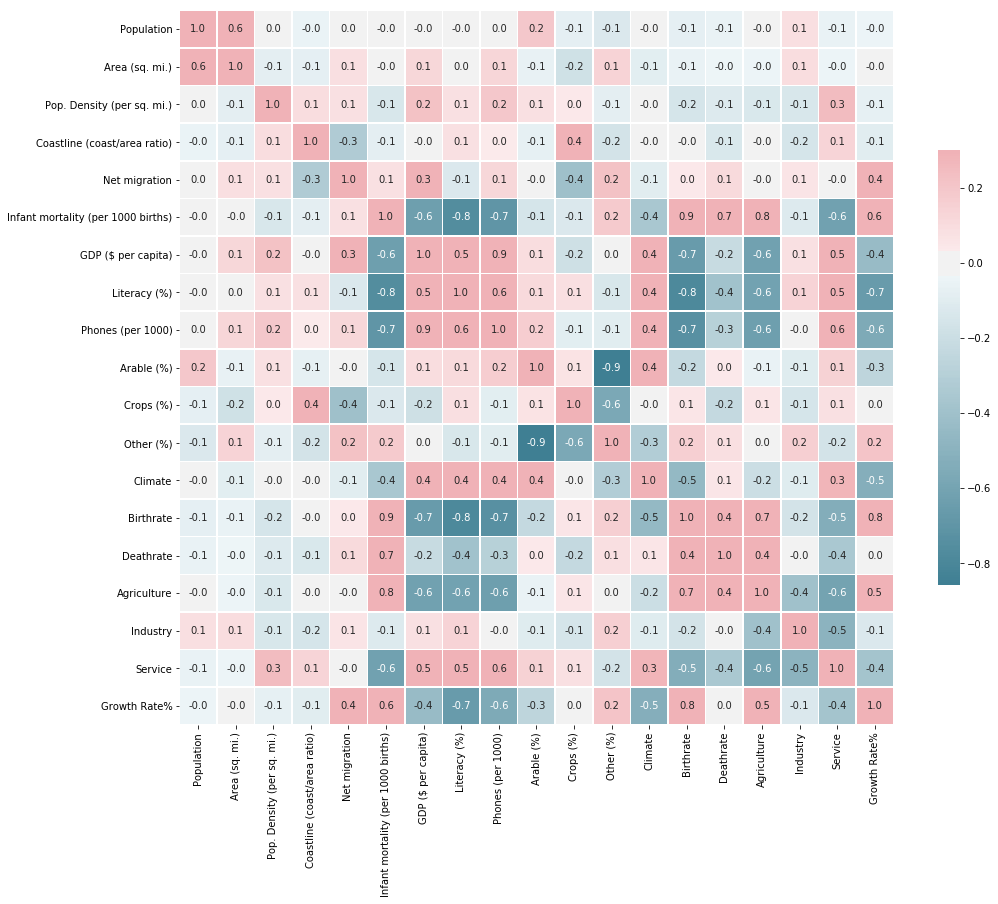

In [32]:
f, ax = plt.subplots(figsize=(16, 16))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(), cmap=cmap, vmax=.3, center=0,square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5},fmt= '.1f')
plt.show()

I am going to select the features which are correlated moderately or higher. But I left some features even though it is correlated because these features were used for calculation of growth rate. After selection lets look at correlation matrix.

In [33]:
data2=data.loc[:,["GDP ($ per capita)","Literacy (%)","Climate","Agriculture","Industry","Service","Growth Rate%"]]
data2["index"]=np.arange(1,len(data2)+1)
fig = ff.create_scatterplotmatrix(data2, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',title="Growth Factors",
                                  height=1200, width=1200)
iplot(fig)



We can inspect correlation of each feature by each other and how they scattered.

Lastly we are going to find Physiological Intensity for slected countries. For those who dont know what Physiological Intensity means, it is a density of population on crop area which is a useful feature that how many people feed or benefit from crop area in his/her country.

Pi=Pd/Cr*100

Pi=Physiological Intensity

Pd=Population Density

Cr=Rate of Crops


In [35]:
def Intensity(row):
    return (row["Pop. Density (per sq. mi.)"]/row["Crops (%)"])*100
max_pop["Physiological Intensity(sq.mi.)"]=max_pop.apply(Intensity,axis=1)
max_pop[["Country","Physiological Intensity(sq.mi.)"]]

,Country,Physiological Intensity(sq.mi.)
6,Australia,6500.000000
20,Brazil,2455.555556
33,China,10952.000000
46,Egypt,16416.666667
60,Germany,39135.593220
89,Latvia,7489.361702
109,Nigeria,4820.945946
117,Poland,11008.928571
150,Turkey,2725.075529
153,Ukraine,4807.453416


In [36]:
trace0 = go.Scatter(
    x=max_pop["Physiological Intensity(sq.mi.)"],
    y=max_pop["Population"],
    text=max_pop.Country ,
    mode='markers',
    marker=dict(
        colorbar = {'title':'Crops (%)'},
        color=max_pop["Crops (%)"],
        size=max_pop["Pop. Density (per sq. mi.)"],
        showscale=True
    )
)

data3 = [trace0]
layout = go.Layout(
    title='Physiological Intensity v. Population by v. Pop. Density by Crops% ',
    xaxis=dict(
        title='Physiological Intensity',
    ),
    yaxis=dict(
        title='Population',
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig = go.Figure(data = data3, layout = layout)
iplot(fig)




We can see Germany has the most Physiological Intensity due to high population and low crop area.

# 5. CONCLUSION

Finally we analyzed our data by population and its correlated features, applied our models and also visualisated what we found.Do you think which growth' model is suitable for calculating future populations?